In [42]:
import sys
import matplotlib
import numpy as np
import scipy as sp
import sklearn 
import pandas as pd

In [43]:
#irisデータを読み込み
from sklearn.datasets import load_iris
iris_datasets = load_iris()
x_iris = iris_datasets.data
y_iris = iris_datasets.target

In [44]:
X = pd.DataFrame(x_iris )
y = pd.DataFrame(y_iris)

In [45]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [46]:
X = X.rename(columns = { 0 : 'sepal_length' , 1: 'sepal_width',  2 : 'petal_length', 3 : 'petal_width'})
y = y.rename(columns = { 0 : 'Species'})

In [47]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [49]:
df_list = [X, y]
df = pd.concat(df_list, axis = 1)

In [50]:
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。

先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
ラベルごとのサンプル数の合計を出力する。
特徴量に欠損値があるかを確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [54]:
df.head(4)#4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [55]:
df.info()#ラベルごとのサンプル数の合計を出力する。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
Species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [61]:
df.isnull()#特徴量に欠損値があるかを確認する。

,sepal_length,sepal_width,petal_length,petal_width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [62]:
df.describe()#特徴量の平均値と標準偏差、四分位数を一度に表示させる

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [58]:
df.sum()#各列の合計値　

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
Species         150.0
dtype: float64

【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

アイリスの花のデータセットまたはフィッシャーのアイリスデータセットは、1936年の論文「線形判別分析の例としての分類学的問題における複数の測定の使用」でイギリスの統計学者および生物学者ロナルドフィッシャーによって紹介された多変量データセットです。エドガー・アンダーソンがデータを収集して、関連する3種のアイリスの花の形態的変動を定量化したため、アンダーソンのアイリスデータセットと呼ばれることもあります。 3種のうち2種は、「すべて同じ牧草地から採取され、同じ日に採取され、同じ装置で同じ人によって同時に測定された」ガスペ半島で収集されました。

データセットは、3種のアイリス（Iris setosa、Iris virginica、Iris versicolor）のそれぞれからの50個のサンプルで構成されています。各サンプルから4つの特徴が測定されました：がく片と花びらの長さと幅（センチメートル単位）。これら4つの特徴の組み合わせに基づいて、フィッシャーは種を互いに区別するための線形判別モデルを開発しました。

クラスターセットでこのデータセットを使用することは一般的ではありません。データセットには2つのクラスターしか含まれておらず、かなり明確に分離されているためです。クラスターの1つはアヤメsetosaを含み、もう1つのクラスターはアヤメvirginicaとアヤメversicolorの両方を含み、フィッシャーが使用した種情報なしでは分離できません。これにより、データマイニングにおける教師あり手法と教師なし手法の違いを説明するためのデータセットが良い例になります。フィッシャーの線形判別モデルは、オブジェクトの種がわかっている場合にのみ取得できます。クラスラベルとクラスターは必ずしも同じではありません。

In [135]:
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

①sepal_widthの列を３つの異なる方法で抽出する

In [63]:
df['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [64]:
df.loc[:,"sepal_width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [65]:
df.sepal_width

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [66]:
df.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

②50番目から99番目までのデータを抽出する

In [67]:
df.iloc[50: 100]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


③petal_lengthの列の50番目から99番目までのデータを抽出する

In [68]:
df.iloc[50:100, 3]

50    1.4
51    1.5
52    1.5
53    1.3
54    1.5
55    1.3
56    1.6
57    1.0
58    1.3
59    1.4
60    1.0
61    1.5
62    1.0
63    1.4
64    1.3
65    1.4
66    1.5
67    1.0
68    1.5
69    1.1
70    1.8
71    1.3
72    1.5
73    1.2
74    1.3
75    1.4
76    1.4
77    1.7
78    1.5
79    1.0
80    1.1
81    1.0
82    1.2
83    1.6
84    1.5
85    1.6
86    1.5
87    1.3
88    1.3
89    1.3
90    1.2
91    1.4
92    1.2
93    1.0
94    1.3
95    1.2
96    1.3
97    1.3
98    1.1
99    1.3
Name: petal_width, dtype: float64

④petal_widthの値が0.2のデータを抽出する

In [69]:
df[df.petal_width == 0.2]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


In [70]:
df[df.iloc[:,3] == 0.2]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


※locとilocの違い
カッコの中を指定する際にlocは文字で指定、ilocは数字で指定。

【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください

In [155]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [73]:
print(len(y[y.iloc[:,0] == 0]))#０種の個数　
print(len(y[y.iloc[:,0] == 1]))#１種の個数
print(len(y[y.iloc[:,0] == 2]))#2種の個数

50
50
50


([<matplotlib.patches.Wedge at 0x1a25691890>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris virginica'),
  Text(0.5500001486524351, -0.9526278583383437, 'Iris versicolor')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.3000000810831464, -0.5196151954572784, '33.3%')])

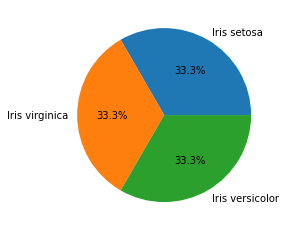

In [74]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# 円グラフを描画
number_of_samples = np.array([len(y[y.iloc[:,0] == 0]),
                                                         len(y[y.iloc[:,0] == 1]),
                                                         len(y[y.iloc[:,0] == 2])])

label_list = ['Iris setosa', 'Iris virginica', 'Iris versicolor']#各種の名前
plt.pie(number_of_samples, labels = label_list, autopct="%1.1f%%")
#出力時にパーセント表示

②特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

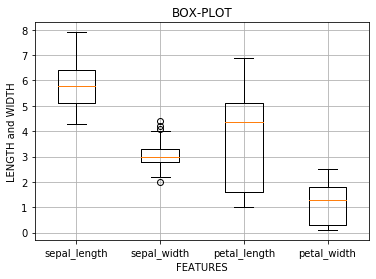

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

#各列データを抽出
sepal_length = df.sepal_length
sepal_width = df.sepal_width
petal_length = df.petal_length
petal_width = df.petal_width

#特徴量　データとラベルをリスト化
features = [sepal_length, sepal_width, petal_length, petal_width]
label_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

#boxplotで出力する。
plt.boxplot(features, labels = label_list )
# plt.boxplot(sepal_width)
# plt.boxplot(petal_length)
# plt.boxplot(petal_width)

# タイトル及びラベル
plt.title('BOX-PLOT')
plt.xlabel('FEATURES')
plt.ylabel('LENGTH and WIDTH')
# Y軸のメモリのrange

# グリッドを入れる
plt.grid()

# 描画
plt.show()

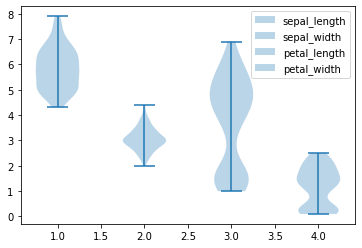

In [209]:
# バイオリン図作成
plt.violinplot(features)
plt.legend(label_list)
plt.show()

ヴァイオリン図の方が視覚的に分布を理解しやすい。
しかし、データが少ないと実際とは違った分布を示す　。
ヴァイオリン図はデータ　同士を滑らかにつなぐようにするため、隙間を滑らかになるよに埋めようとするため。

【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。

縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

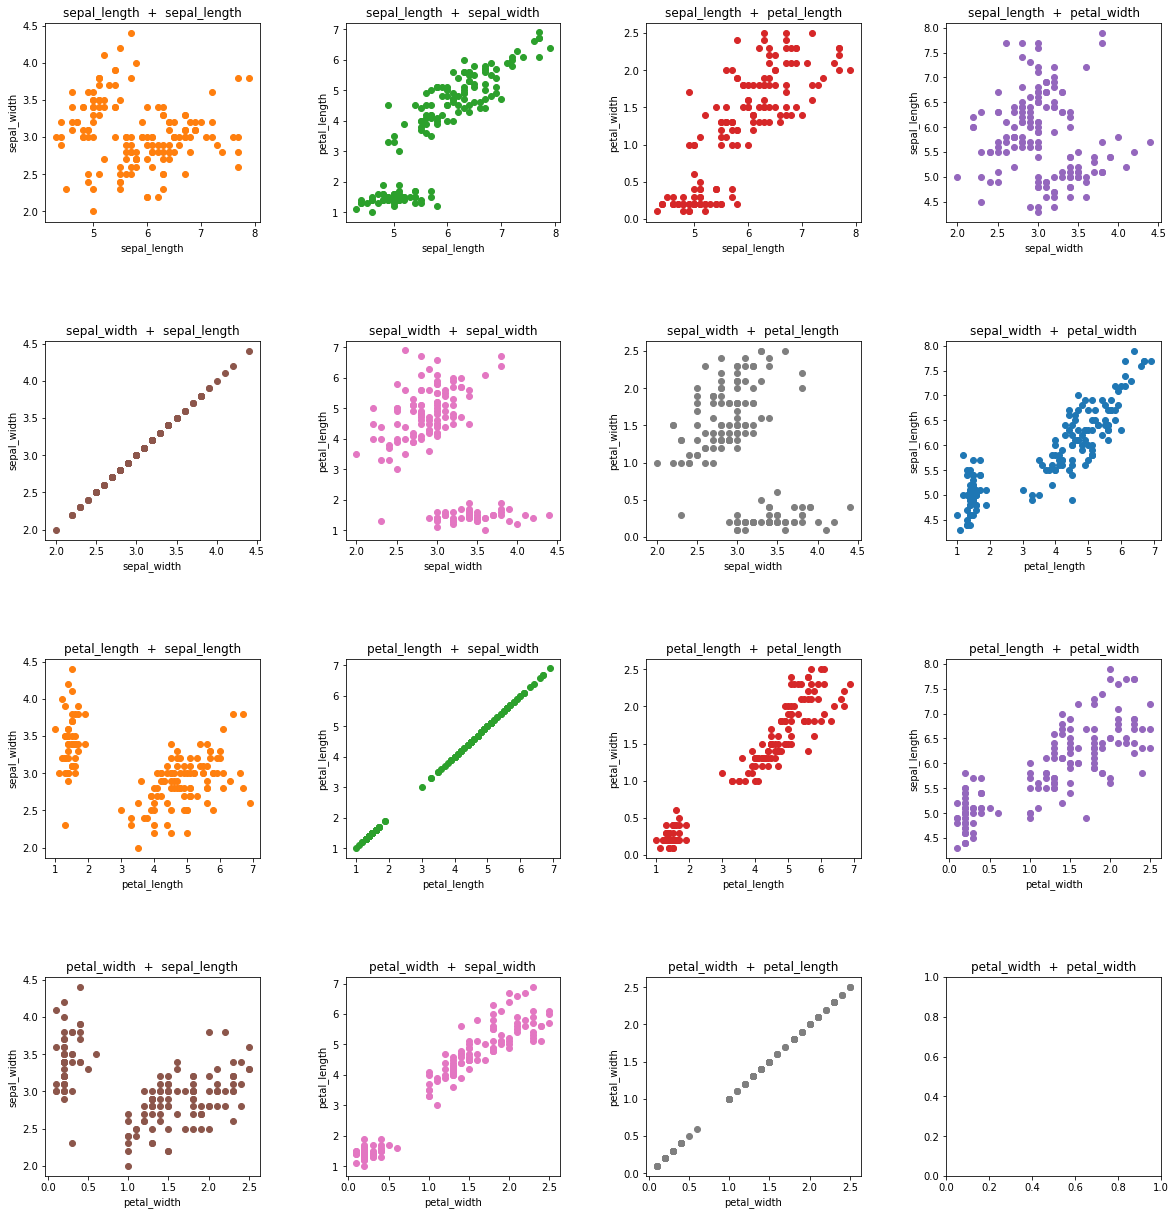

In [89]:
#特徴量データを抽出
sepal_length = df.sepal_length
sepal_width = df.sepal_width
petal_length = df.petal_length
petal_width = df.petal_width
plt.figure(figsize=(20, 700))

#特徴量データとラベルをリスト化
features = [sepal_length, sepal_width, petal_length, petal_width]
label_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cmap = plt.get_cmap("tab10")#カラーサイクルを採用

# カウントアップを4種類用意
count1 = 0
count2 = 0
count3 = 0
count4 = 0

for i in features:
    for k in features:
#         各軸ラベルをカウント変数でリストから抽出
        plt.xlabel(label_list[count2])
        plt.ylabel(label_list[count3])
        
#         数値情報をプロット、カラーを指定（カウント変数で色指定）
        plt.scatter(i, k, color = cmap(count４))
        
#         各グラフ間を適度に開けて文字が重ならないうようにする。
        plt.subplots_adjust(wspace=0.4, hspace=0.6)
        
#         プロットの範囲の指定、４列、縦サイズ１２０、グラフ　番号をカウントで指定
        plt.subplot(120,4,count1+1)
        
#         タイトルに組み合わせを表示する
        plt.title(label_list[count2] +'  +  '+ label_list[count3])
     
#         一列ごとに１カウントしていく
        count1 += 1
        count3 += 1
        count4 += 1
        if count4 == 8:
            count4 = 0
        
#         行ごとにカウントしていく。
    count2 +=1
    
# １行の最後に０に戻す
    count3 = 0

相関関係が見られる場合、　分布が線形に近く。

４つの特徴量に関する相関係数行列を作る
相関係数行列のヒートマップを作る

In [78]:
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


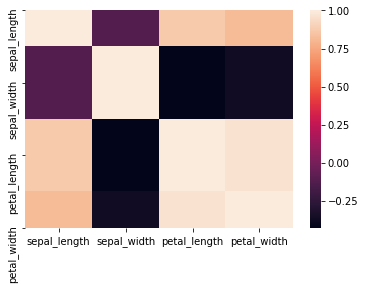

In [79]:
# 相関係数行列のヒートマップを作る
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(X.corr())
plt.show()

考察：
sepalの幅と長さについては相関関係はほぼなし
petallの幅と長さに関しては相関関係が見られる。
また、sepalの幅はどことも相関関係がないようだ。

【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください

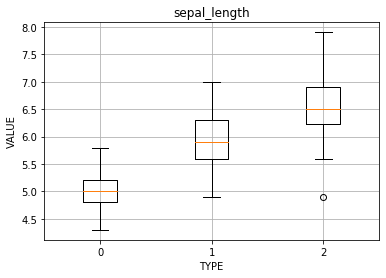

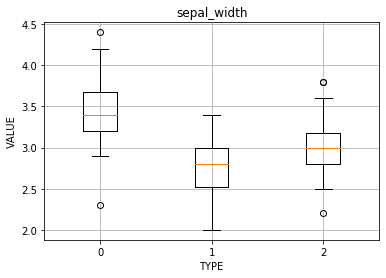

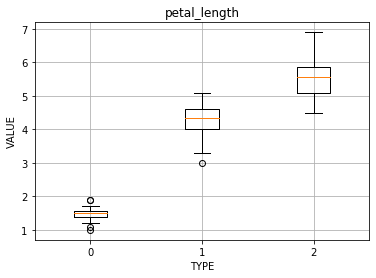

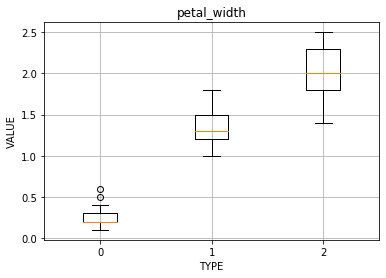

In [131]:
type_0 = df[df.iloc[:,-1] == 0]#０種data
type_1 = df[df.iloc[:,-1] == 1]#１種data
type_2 = df[df.iloc[:,-1] == 2]#2種data

#特徴量データとラベルをリスト化
title_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
label_list = ['0', '1', '2']

for i in range(4):
    #boxplotで出力する。
    plt.boxplot([type_0.iloc[:, i], 
                      type_1.iloc[:, i],
                      type_2.iloc[:, i]], labels = label_list)

# タイトル及びラベル
    plt.title(title_list[i])
    plt.xlabel('TYPE')
    plt.ylabel('VALUE')

    # グリッドを入れる
    plt.grid()
  

    # 描画
    plt.show()
    

三種類で比較して、

| type  | sepal_length | sepal_width | petal_length |　 petal_width　　 |
|:---------|:---|:---|:---|:---|
| TYPE0 | 小 | 大 |小 | 小 |
| TYPE1 | 中 | 小 | 中 | 中 |
| TYPE2 |　大 | 中 | 大 | 大 |

type0はもっとも識別が容易と思われる。petalを比較すればすぐわかる。
petalにおいて、type1小、type2大の傾向があるが、値が同じ場合もあるため、
今回の情報だけで高精度に区別するのは難しいと思われる。比較するならやはりpetalの値に注目する。
